# Elementary Monte Carlo methods

## Hit and miss

We will solve a simple one dimensional integral,

$$
\int_0^1 \sqrt{1-x^2} dx = \frac{1}{2}sin^{-1}1,
$$

using hit and miss method

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='retina'

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [40]:
def g(x):
    return np.sqrt(1 - x**2)

In [5]:
def hitmiss(g,a,b,c,M):
    count = 0
    for i in range(1,M):
        u = np.random.rand()
        v = np.random.rand()
        if (g(a+(b-a)*u) > c*v):
            count += 1
    p = count/M
    r=(b-a)*c*p
    s=np.sqrt(p*(1-p)/M)*c*(b-a)
    return [r,s]       

In [15]:
Ms =np.arange(1000,10**6,10000) 
rs= [hitmiss(g,0,1,1,Ms[i])[0] for i in range(0,len(Ms))]
ss= [hitmiss(g,0,1,1,Ms[i])[1] for i in range(0,len(Ms))]
actual = np.zeros(len(Ms))
actual.fill(np.arcsin(1)/2)

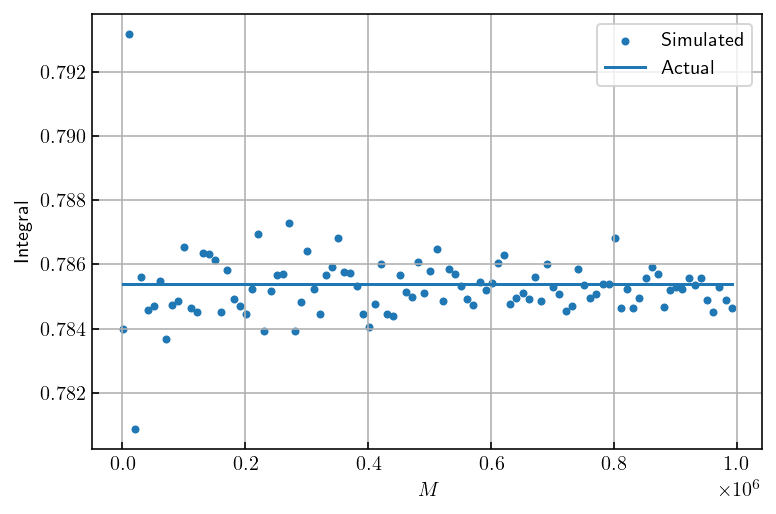

In [16]:
plt.scatter(Ms,rs,marker='.',label='Simulated')
plt.plot(Ms,actual,label='Actual')
plt.xlabel('$M$')
plt.ylabel('Integral')
plt.grid()
plt.legend()

Note that as $M$ increases, the result gets closer to the actual one and the error decreases as shown below.

In [17]:
def func(x, a, c):
    return a * x + c 

In [18]:
sfit,_ = curve_fit(func,1/np.sqrt(Ms),ss)

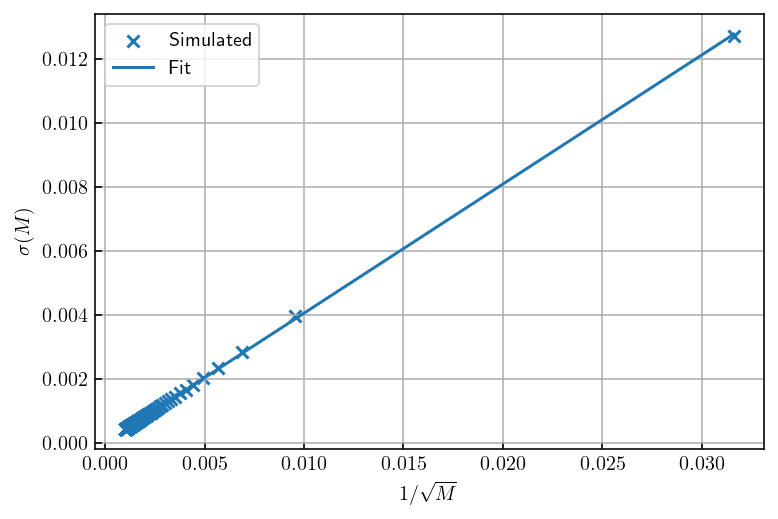

In [19]:
plt.scatter(1/np.sqrt(Ms),ss,label='Simulated',marker='x')
plt.plot(1/np.sqrt(Ms),sfit[0]*(1/np.sqrt(Ms))+sfit[1],label='Fit')
plt.xlabel('$1/\sqrt{M}$')
plt.ylabel('$\sigma (M)$')
plt.grid()
plt.legend()

Finally, the value of the intgral after $10^6$ Monte Carlo steps, the result of the integral is,

In [20]:
print(f'Simulated = {np.around(rs[-1],5)}, Actual = {np.around(np.arcsin(1)/2,5)}')

Simulated = 0.78464, Actual = 0.7854


## Uniform sampling

Consider the same integral agian but this time we derive the random numbers from a uniform distribution.

In [44]:
def uni(u):
    return np.random.rand()

Check the distribution.

Text(0, 0.5, 'Pdf')

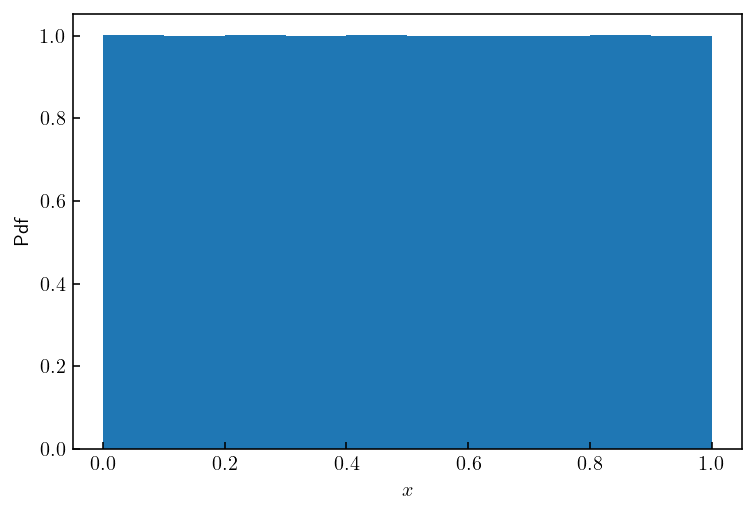

In [58]:
plt.hist(np.random.rand(10**7),density=True);
plt.xlabel('$x$')
plt.ylabel('Pdf')

In [36]:
def mc(fun,rd_fun,M):
    f=0
    f_sq=0
    for counts in range(1,M+1):
        u=np.random.uniform() 
        x=rd_fun(u)
        g0=fun(x)
        f=f+g0
        s=f_sq+g0*g0
    f=f/M
    sigma_u=np.sqrt((-f/M+f*f)/M)
    return f, sigma_u

In [48]:
print(f'Simulated = {round(mc(g,uni,10000)[0],5)}, Std = {round(mc(g,uni,10000)[1],5)}, Actual = {np.around(np.arcsin(1)/2,5)}' )

Simulated = 0.78447, Std = 0.00785, Actual = 0.7854


## Importance sampling

We will now solve,

$$
\int_0^\infty dx \sqrt{x} cosx e^{-x},
$$

by deriving random numbers from exponential distribution.

In [51]:
def fx(x):
    return -np.log(x)

Lets first verify, if the distribution is generated.

In [55]:
y=[]
for run in range(10**6):
    u=np.random.uniform()
    y.append(fx(u))

Text(0, 0.5, 'Pdf')

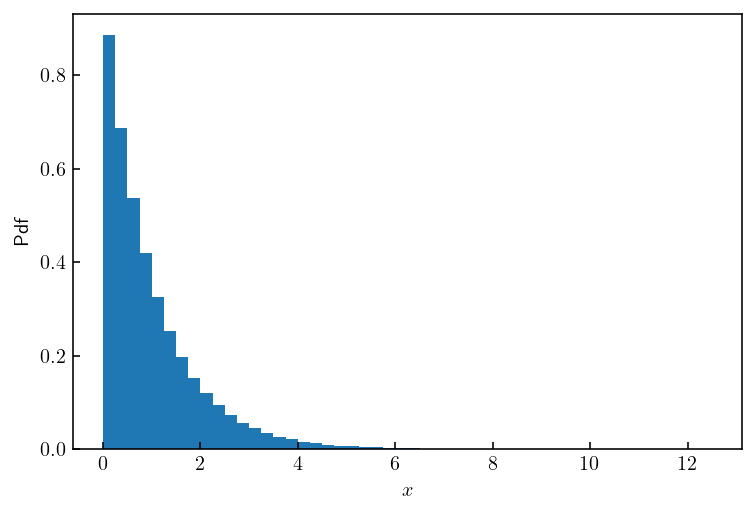

In [57]:
plt.hist(y,bins=50,density=True);
plt.xlabel('$x$')
plt.ylabel('Pdf')

We now average $\sqrt{x}cosx$ over this distribution.

In [60]:
def g1(x):
    return np.sqrt(x)*np.cos(x)

In [64]:
print(f'Simulated = {round(mc(g1,fx,10**6)[0],5)}, Std = {round(mc(g1,fx,10**6)[1],5)}, Actual = {np.around(0.201656,5)}' )

Simulated = 0.20176, Std = 0.0002, Actual = 0.20166


***